# La faim dans le monde et ses problématiques : analyse des données disponibles de la FAO pour 2017

Dans 7 ans, l'humanité aura atteint la date butoir de l'Agende 2030 et de ses 17 Objectif de Développements Durable votés par l'Organisation des Nations Unies.
Le deuxième objectif est l'éradication de la faim dans le monde, l'assurance de la sécurité alimentaire et la promotion d'une agriculture durable, et c'est l'objectif de la mission confié à la FAO.
Bien que la production alimentaire mondiale soit actuellement suffisante pour couvrir les besoins de l'humanité, il reste cependant des problématiques liées à la répartition de cette production à travers le monde.
L'objectif de ce document est de proposer un traitement des données mises à la disposition de la FAO sur la base de l'année 2017 afin de mettre en avant et de tenter de répondre à certaines problématiques.

In [339]:
#On commence tout d'abord par importer les fichiers csv de la FAO accompagnés des principaux modules utilisés durant l'étude
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [340]:
#Pour le bien de l'analyse, il est nécessaire de prendre des paramètres arbitraires afin de mieux mettre en avant certaines problématiques
annee = '2017' #Les documents à disposition couvrent une période plus large, on s'arrête ici à l'année 2017
nombre_jours = 365 #Paramètre nécessaire pour la conversion des jours et années sur certaines données
nombre_calories_requis = 2400 #On présuppose ici qu'un être humain a en moyenne besoin de 2400 calories, 93 grammes de matieres grasses et 100 grammes de protéines par jour pour assurer l'exercice de ses fonctions motrices
quantite_matieres_grasses_jour = 93
quantite_proteines_jour = 100

In [341]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
population = pd.read_csv('population.csv')
sous_nutrition = pd.read_csv('sous_nutrition.csv')

# Première étape : analyse des fichiers à disposition

Pour commencer notre analyse, on se propose tout d'abord d'analyser les fichiers mis à notre disposition par la FAO afin d'en détecter les particularités et procéder à une élimination des données problématiques.

### Analyse du fichier sous-nutrition 

In [342]:
sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [343]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


On commence par modifier les noms des colonnes pour mieux les faire correspondre à nos besoins, puis on part ensuite à la recherche des éventuelles valeurs nulles ainsi que des valeurs aberrantes.

In [344]:
sous_nutrition = sous_nutrition.replace({'Année': {'2012-2014':'2013',
                                                   '2013-2015':'2014',
                                                   '2014-2016':'2015',
                                                   '2015-2017':'2016',
                                                   '2016-2018':'2017',
                                                   '2017-2019':'2018'}})
sous_nutrition.rename(columns = {'Valeur':'Habitants sous-nutrition'}, inplace=True)

In [345]:
sous_nutrition.isnull().sum()

Zone                          0
Année                         0
Habitants sous-nutrition    594
dtype: int64

In [346]:
sous_nutrition['Habitants sous-nutrition'].value_counts()

<0.1     120
0.3       48
0.4       32
0.2       28
1.5       20
        ... 
3.7        1
24.1       1
189.2      1
190.1      1
8.3        1
Name: Habitants sous-nutrition, Length: 139, dtype: int64

Une fois les valeurs problématiques cadrillées, on se propose de définir un nouveau tableau se restreignant au champ d'étude requis, puis à partir de ce nouveau tableau, on se met à disposition une liste des valeurs problématiques en vue d'une prise de décision.

In [347]:
sous_nutrition2017 = sous_nutrition.loc[(sous_nutrition['Année']==annee)]

In [348]:
sous_nutrition2017.loc[(sous_nutrition['Habitants sous-nutrition']=='<0.1')]

,Zone,Année,Habitants sous-nutrition
64,Arménie,2017,<0.1
106,Barbade,2017,<0.1
124,Belize,2017,<0.1
196,Cabo Verde,2017,<0.1
232,Chine - RAS de Macao,2017,<0.1
250,Chypre,2017,<0.1
310,Dominique,2017,<0.1
382,Fidji,2017,<0.1
466,Guyana,2017,<0.1
502,Îles Salomon,2017,<0.1


In [349]:
sous_nutrition2017.loc[sous_nutrition['Habitants sous-nutrition'].isnull(),:]

,Zone,Année,Habitants sous-nutrition
28,Allemagne,2017,NaN
34,Andorre,2017,NaN
46,Antigua-et-Barbuda,2017,NaN
70,Australie,2017,NaN
76,Autriche,2017,NaN
...,...,...,...
1168,Tuvalu,2017,NaN
1180,Uruguay,2017,NaN
1204,Yémen,2017,NaN
1210,Zambie,2017,NaN


Après observation des données, on peut arriver à la conclusion que les données problématiques peuvent être rangées en trois catégories : 

- celles en provenance de pays développés où la FAO n'a pas jugé pertinent de récupérer des données
- celles où il était problématique de récupérer des données dans les pays concernés, pour des raisons telles que les guerres et/ou les épidémies
- celles étant négligeables / inexploitables en l'état

Au regard de cet ensemble, on prend la décision de transformer toutes les valeurs inférieures à 0,1 en 0 et d'utiliser les fonctions de conversion de Pandas pour transformer les données en valeurs numériques afin de permettre des opérations sur ces dernières.

In [350]:
sous_nutrition2017 = sous_nutrition2017.replace({'Habitants sous-nutrition': {'<0.1': 0}})
sous_nutrition2017.fillna(0,inplace=True)
sous_nutrition2017['Habitants sous-nutrition']=pd.to_numeric(sous_nutrition2017['Habitants sous-nutrition'],errors='coerce')
sous_nutrition2017['Habitants sous-nutrition']=sous_nutrition2017['Habitants sous-nutrition'] * 1e6
sous_nutrition2017 = sous_nutrition2017.drop('Année',axis=1)
sous_nutrition2017.head()

,Zone,Habitants sous-nutrition
4,Afghanistan,10500000.0
10,Afrique du Sud,3100000.0
16,Albanie,100000.0
22,Algérie,1300000.0
28,Allemagne,0.0


### Analyse du fichier population

In [351]:
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [352]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Comme précédemment, on se propose d'effectuer quelques modifications sur le fichier de base, afin de mieux permettre certaines opérations pour la suite. On procède ensuite à un filtrage pour n'avoir à disposition que les données correspondant à l'année 2017.

In [353]:
population['Année'] = population.Année.astype(str)
population.rename(columns = {'Valeur':'Nombre habitants'}, inplace=True)
population['Nombre habitants'] = population['Nombre habitants'] * 1000
population.head()

,Zone,Année,Nombre habitants
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [354]:
population2017 = population.loc[population['Année']==annee]
population2017 = population2017.drop('Année',axis=1)
population2017.head()

,Zone,Nombre habitants
4,Afghanistan,36296113.0
10,Afrique du Sud,57009756.0
16,Albanie,2884169.0
22,Algérie,41389189.0
28,Allemagne,82658409.0


Pour la suite de l'analyse, on se propose de calculer le nombre d'êtres humains présents sur Terre pour l'année 2017, afin de pouvoir stocker le résultat dans une variable réutilisable pour plus tard.

In [355]:
population_mondiale_2017 = population2017['Nombre habitants'].sum()
print("Pour l'année 2017, les données de la FAO nous amènent à un nombre de ",population_mondiale_2017," personnes vivant sur Terre.")

Pour l'année 2017, les données de la FAO nous amènent à un nombre de  7548134111.0  personnes vivant sur Terre.


# Etat de la sous-nutrition dans le monde pour l'année 2017

## Calcul du nombre de personnes en sous-nutrition en 2017

Pour analyser la problématique de la sous-nutrition dans le monde, on se propose de combiner les tableaux concernant la sous-nutrition et les niveaux de population que nous avons construit précédemment, en utilisant la colonne des zones comme point de référence.

In [356]:
tableau_sous_nutrition = pd.merge(sous_nutrition2017,population2017, on=['Zone'])
tableau_sous_nutrition.head()

,Zone,Habitants sous-nutrition,Nombre habitants
0,Afghanistan,10500000.0,36296113.0
1,Afrique du Sud,3100000.0,57009756.0
2,Albanie,100000.0,2884169.0
3,Algérie,1300000.0,41389189.0
4,Allemagne,0.0,82658409.0


In [357]:
habitants_sous_nutrition_monde_2017 = tableau_sous_nutrition["Habitants sous-nutrition"].sum()
pourcentage_sous_nutrition_2017 = round((habitants_sous_nutrition_monde_2017 / population_mondiale_2017) * 100,3)
print("Au regard des données à disposition, il y a en 2017 un total de ",habitants_sous_nutrition_monde_2017,"personnes en situation de sous-nutrition, ce qui correspond à un pourcentage de ",pourcentage_sous_nutrition_2017,"% de la population mondiale." )

Au regard des données à disposition, il y a en 2017 un total de  535700000.0 personnes en situation de sous-nutrition, ce qui correspond à un pourcentage de  7.097 % de la population mondiale.


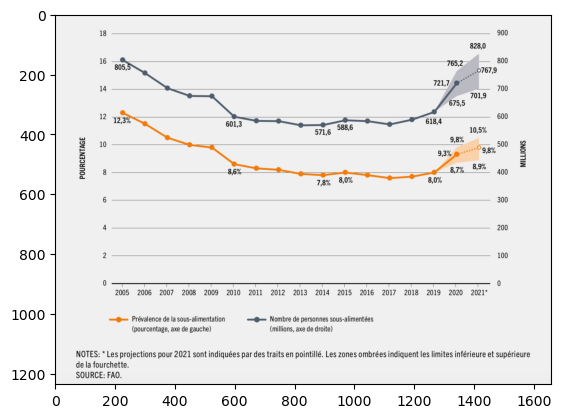

In [358]:
evolution_faim_monde = img.imread("evolution-faim-monde.jpg")
plt.imshow(evolution_faim_monde)
plt.show()

## Analyse des besoins en nourriture de la population au niveau mondial

Pour évaluer les besoins en nourriture au niveau mondial, on se propose la méthodologie suivante : 
- on combine tout d'abord le tableau des disponibilités alimentaires des pays avec celui des populations
- celui-ci nous permet de développer la disponibilité annuelle en calories d'un pays par aliments, laquelle s'obtient à partir de l'équation suivante : Disponibilité annuelle = (Disponibilité alimentaire (Kcal/personne/jour) * Nombre_jours * Population du pays
- on additionne ensuite l'ensemble des disponibilités annuelles obtenues pour obtenir la disponibilité annuelle mondiale, laquelle peut être alors comparée aux besoins humains.

In [359]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [360]:
tableau_besoin = pd.merge(population2017,dispo_alimentaire, on='Zone')
tableau_besoin['Disponibilité annuelle'] = tableau_besoin['Disponibilité alimentaire (Kcal/personne/jour)'] * nombre_jours * tableau_besoin['Nombre habitants']
tableau_besoin.head()

,Zone,Nombre habitants,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité annuelle
0,Afghanistan,36296113.0,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,6.624041e+10
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+10
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+10
3,Afghanistan,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+10


In [361]:
disponibilité_totale = tableau_besoin['Disponibilité annuelle'].sum()
print("La disponibilité alimentaire annuelle au niveau mondial est à hauteur de ",disponibilité_totale, "calories.")

La disponibilité alimentaire annuelle au niveau mondial est à hauteur de  7635429388975815.0 calories.


En utilisant les paramètres préalablement fixés au début de notre étude concernant les besoins humains en calories, on peut alors évaluer la disponibilité alimentaire par rapport aux besoins humains.

In [362]:
dispo_calories_mondiale_annuelle = round(disponibilité_totale / (nombre_calories_requis * nombre_jours),0)
ratio = round(dispo_calories_mondiale_annuelle / population_mondiale_2017 * 100,3)
print("Les capacités actuelles de la production alimentaire au niveau mondial permettraient d'assurer les besoins de ",dispo_calories_mondiale_annuelle, "personnes, ce qui correspond à ",ratio," % de la population mondiale.")

Les capacités actuelles de la production alimentaire au niveau mondial permettraient d'assurer les besoins de  8716243595.0 personnes, ce qui correspond à  115.475  % de la population mondiale.


## Le cas de la disponibilité végétale au niveau mondial

On se propose ensuite d'évaluer la problématique de l'alimentation mondiale sous le prisme de la disponibilité en végétaux. Les données de la FAO nous permettant une séparation rapide de la disponibilité alimentaire en fonction de son origine, il nous suffit de construire un nouveau tableau des besoins adapté aux produits végétaux à partir du précédent.

In [363]:
tableau_besoin_vegetaux = tableau_besoin.loc[tableau_besoin["Origine"] == "vegetale"]
tableau_besoin_vegetaux.head()

,Zone,Nombre habitants,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité annuelle
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+10
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+10
3,Afghanistan,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+10
6,Afghanistan,36296113.0,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [364]:
dispo_vegetale_totale = tableau_besoin_vegetaux['Disponibilité annuelle'].sum()
print("La disponibilité alimentaire annuelle au niveau mondial en termes de produits végétaux est à hauteur de ",dispo_vegetale_totale, "calories.")

La disponibilité alimentaire annuelle au niveau mondial en termes de produits végétaux est à hauteur de  6300178937197865.0 calories.


In [365]:
dispo_calories_mondiale_annuelle_vegetaux = round(dispo_vegetale_totale / (nombre_calories_requis * nombre_jours),0)
ratio = round(dispo_calories_mondiale_annuelle_vegetaux / population_mondiale_2017 * 100,3)
print("Les capacités actuelles de la production alimentaire au niveau mondial permettraient d'assurer les besoins de ",dispo_calories_mondiale_annuelle_vegetaux, "personnes, ce qui correspond à ",ratio," % de la population mondiale.")

Les capacités actuelles de la production alimentaire au niveau mondial permettraient d'assurer les besoins de  7191985088.0 personnes, ce qui correspond à  95.282  % de la population mondiale.


## Les équations de distribution de la disponibilité intérieure

En étudiant les variables disponibles, il est possible de retrouver deux équations permettant d'expliquer la répartition de la disponibilité intérieure au sein d'un pays à partir des 10 variables disponibles. La première se base sur l'utilisation de la disponibilité intérieure au sein d'un pays, la deuxième sur la balance commerciale de la ressource concernée.

- Disponibilité intérieure = Nourriture + Aliments pour Animaux + Autres Utilisations + Semences + Traitement + Pertes
- Disponibilité intérieure = Production + Importations - Exportations + Variation de stock

Pour vérifier cette équation, on se propose de prendre comme exemple le cas du maïs aux Etats-Unis d'Amérique et de voir si les termes de l'équation correspondent.

In [366]:
dispo_mais_etats_unis = dispo_alimentaire.loc[(dispo_alimentaire["Zone"] == "États-Unis d'Amérique") & (dispo_alimentaire["Produit"] == "Maïs")]
dispo_mais_etats_unis = dispo_mais_etats_unis.drop(columns = ["Origine","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"])
dispo_mais_etats_unis

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
15391,États-Unis d'Amérique,Maïs,128024.0,137023.0,292776.0,24655.0,3595.0,3917.0,NaN,353699.0,582.0,23230.0,-39863.0


- 292 776 (Disponibilité intérieure) = 353 699 (Production) + 3 595 (Importations) - 24 655 (Exportations) - 39 863 (Variation de stock) 

L'équation est bien vérifiée ici
- 292 776 (Disponibilité intérieure) = 3 917 (Nourriture) + 128 024 (Aliments pour Animaux) + 137 023 (Autres Utilisations) + 582 (Semences) + 23230 (Traitement)

L'équation est également vérifiée de ce côté

## La question de la valeur nutritive des aliments

- En analysant le tableau des disponibilités alimentaires, on s'aperçoit que la valeur nutritive d'un aliment, qui correspond au nombre de calories apporté par cet aliment en fonction de son poids, n'est pas nécessairement identique entre les pays. Cela peut être du à différents paramètres tels que les méthodes de préparation ou de récolte de l'aliment concerné.
- Il apparaît donc pertinent de doter d'un outil permettant d'étudier cette problématique.
- Pour ce faire, on calcule la disponibilité en calories d'un aliment au niveau d'une zone, que l'on divise ensuite par la quantité de nourriture présente sur celle-ci.

In [367]:
tableau_valeur_nutritive = dispo_alimentaire.drop(columns = ["Origine",
                                                             "Aliments pour animaux",
                                                             "Autres Utilisations",
                                                             "Disponibilité intérieure",
                                                             "Exportations - Quantité",
                                                             "Importations - Quantité",
                                                             "Nourriture",
                                                             "Pertes",
                                                             "Production",
                                                             "Semences",
                                                             "Traitement",
                                                             "Variation de stock"])
tableau_valeur_nutritive = pd.merge(tableau_valeur_nutritive, population2017, on='Zone')
tableau_valeur_nutritive['Disponibilité alimentaire en kg'] = tableau_valeur_nutritive['Disponibilité alimentaire en quantité (kg/personne/an)'] * tableau_valeur_nutritive['Nombre habitants']
tableau_valeur_nutritive['Disponibilité alimentaire en kcal globale'] = tableau_valeur_nutritive['Disponibilité alimentaire (Kcal/personne/jour)'] * tableau_valeur_nutritive['Nombre habitants'] * nombre_jours
tableau_valeur_nutritive['Valeur nutritive'] = round(tableau_valeur_nutritive['Disponibilité alimentaire en kcal globale'] / tableau_valeur_nutritive['Disponibilité alimentaire en kg'],3)
tableau_valeur_nutritive.head()

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nombre habitants,Disponibilité alimentaire en kg,Disponibilité alimentaire en kcal globale,Valeur nutritive
0,Afghanistan,Abats Comestible,5.0,1.72,0.20,0.77,36296113.0,62429314.36,6.624041e+10,1061.047
1,Afghanistan,"Agrumes, Autres",1.0,1.29,0.01,0.02,36296113.0,46821985.77,1.324808e+10,282.946
2,Afghanistan,Aliments pour enfants,1.0,0.06,0.01,0.03,36296113.0,2177766.78,1.324808e+10,6083.333
3,Afghanistan,Ananas,0.0,0.00,NaN,NaN,36296113.0,0.00,0.000000e+00,NaN
4,Afghanistan,Bananes,4.0,2.70,0.02,0.05,36296113.0,97999505.10,5.299232e+10,540.741


## La question des matières grasses et protéines requises

- Une deuxième problématique liée à l'alimentation mondiale est celle de l'apport en matières grasses et protéines, qui doit atteindre un certain seuil en plus de l'apport calorique pour éviter les carences alimentaires.
- Plusieurs études montrent ainsi que les carences alimentaires ont un impact significatif sur les taux de mortalité dans la plupart des pays (source : rapport de l'OMS "Le rôle de l’enrichissement des aliments dans la lutte contre la malnutrition par carence en micronutriments" disponible à l'adresse suivante : https://apps.who.int/nutrition/publications/micronutrients/GFF_Part_1_fr.pdf?ua=1#:~:text=%C3%80%20l'%C3%A9chelle%20mondiale%2C%20les,dans%20les%20pays%20en%20d%C3%A9veloppement.
- En prenant certains seuils comme référence (93 grammes de matières grasses et 100 grammes de protéines par jour), on se propose de construire un tableau mettant les pays présentant des carences alimentaires pour mieux évaluer certains problèmes.

In [368]:
tableau_besoin.head()

,Zone,Nombre habitants,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité annuelle
0,Afghanistan,36296113.0,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,6.624041e+10
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+10
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+10
3,Afghanistan,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+10


In [369]:
tableau_matieres_grasses_proteines = tableau_besoin.drop(columns = [
    "Aliments pour animaux",
    "Nombre habitants",
    "Autres Utilisations",
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité intérieure",
    "Exportations - Quantité",
    "Importations - Quantité",
    "Nourriture",
    "Pertes",
    "Production",
    "Semences",
    "Traitement",
    "Variation de stock",
    "Disponibilité annuelle"])
tableau_matieres_grasses_proteines.head()

,Zone,Produit,Origine,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
0,Afghanistan,Abats Comestible,animale,0.20,0.77
1,Afghanistan,"Agrumes, Autres",vegetale,0.01,0.02
2,Afghanistan,Aliments pour enfants,vegetale,0.01,0.03
3,Afghanistan,Ananas,vegetale,NaN,NaN
4,Afghanistan,Bananes,vegetale,0.02,0.05


In [370]:
tableau_matieres_grasses_proteines = tableau_matieres_grasses_proteines.groupby("Zone").sum()
tableau_matieres_grasses_proteines

,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,
Afghanistan,33.50,58.26
Afrique du Sud,83.58,85.33
Albanie,106.48,111.37
Algérie,76.48,91.92
Allemagne,141.62,101.39
...,...,...
Émirats arabes unis,87.16,104.51
Équateur,94.64,61.30
États-Unis d'Amérique,161.37,109.42


In [371]:
tableau_carences_matieres_grasses = tableau_matieres_grasses_proteines.loc[tableau_matieres_grasses_proteines['Disponibilité de matière grasse en quantité (g/personne/jour)'] <= quantite_matieres_grasses_jour]
tableau_carences_matieres_grasses = tableau_carences_matieres_grasses.drop(columns = ['Disponibilité de protéines en quantité (g/personne/jour)'])
tableau_carences_matieres_grasses.sort_values('Disponibilité de matière grasse en quantité (g/personne/jour)')

,Disponibilité de matière grasse en quantité (g/personne/jour)
Zone,
Rwanda,23.77
Madagascar,24.49
Éthiopie,25.89
Bangladesh,29.92
Lesotho,32.26
...,...
Tunisie,91.44
Maurice,92.09
Trinité-et-Tobago,92.55


In [372]:
tableau_carences_proteines = tableau_matieres_grasses_proteines.loc[tableau_matieres_grasses_proteines['Disponibilité de protéines en quantité (g/personne/jour)'] <= quantite_proteines_jour]
tableau_carences_proteines = tableau_carences_proteines.drop(columns = ['Disponibilité de matière grasse en quantité (g/personne/jour)'])
tableau_carences_proteines.sort_values('Disponibilité de protéines en quantité (g/personne/jour)')

,Disponibilité de protéines en quantité (g/personne/jour)
Zone,
Libéria,37.66
Guinée-Bissau,44.05
Mozambique,45.68
République centrafricaine,46.04
Madagascar,46.69
...,...
Polynésie française,97.27
Maroc,97.88
"Chine, continentale",98.05


## La répartition de la disponibilité intérieure au sein des pays

Rappelons pour commencer l'équation de répartition de disponibilité intérieure d'un pays :

**Disponibilité alimentaire : Nourriture + Aliments pour Animaux + Autres Utilisations + Pertes + Semences + Traitement**

- Pour poursuivre notre étude, après s'être intéressé à la construction de tableaux pouvant mettre en évidence les pays présentant le plus de difficultés en termes d'apport calorique et de qualité nutritionnelle, on se propose désormais d'étudier la manière dont les pays utilisent les stocks de nourriture à leur disposition, en d'autres termes, la répartition de leur disponibilité intérieure.
- On se propose par conséquent de construire un tableau d'analyse de cette répartition à partir du tableau de disponibilité alimentaire, pour pouvoir par la suite mettre en évidence certains facteurs.

In [373]:
tableau_analyse_repartition = dispo_alimentaire.drop(columns = ["Exportations - Quantité", "Importations - Quantité", "Production","Variation de stock","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)","Origine"])
proportion_nourriture = round((tableau_analyse_repartition['Nourriture'] / tableau_analyse_repartition['Disponibilité intérieure']) * 100,3)
proportion_animaux = round((tableau_analyse_repartition['Aliments pour animaux'] / tableau_analyse_repartition['Disponibilité intérieure']) * 100,3)
proportion_utilisations = round((tableau_analyse_repartition['Autres Utilisations'] / tableau_analyse_repartition['Disponibilité intérieure']) * 100,3)
proportion_pertes = round((tableau_analyse_repartition['Pertes'] / tableau_analyse_repartition['Disponibilité intérieure']) * 100,3)
proportion_semences = round((tableau_analyse_repartition['Semences'] / tableau_analyse_repartition['Disponibilité intérieure']) * 100,3)
proportion_traitement = round((tableau_analyse_repartition['Traitement'] / tableau_analyse_repartition['Disponibilité intérieure']) * 100,3)
tableau_analyse_repartition['Pourcentage Nourriture'], tableau_analyse_repartition['Pourcentage Aliments pour Animaux'], tableau_analyse_repartition['Pourcentage Autres Utilisations'], tableau_analyse_repartition ['Pourcentage Pertes'], tableau_analyse_repartition['Pourcentage Semences'], tableau_analyse_repartition['Pourcentage Traitement'] = [proportion_nourriture, proportion_animaux, proportion_utilisations, proportion_pertes, proportion_semences, proportion_traitement]
tableau_analyse_repartition.head()

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement,Pourcentage Nourriture,Pourcentage Aliments pour Animaux,Pourcentage Autres Utilisations,Pourcentage Pertes,Pourcentage Semences,Pourcentage Traitement
0,Afghanistan,Abats Comestible,NaN,NaN,53.0,53.0,NaN,NaN,NaN,100.000,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",NaN,NaN,41.0,39.0,2.0,NaN,NaN,95.122,NaN,NaN,4.878,NaN,NaN
2,Afghanistan,Aliments pour enfants,NaN,NaN,2.0,2.0,NaN,NaN,NaN,100.000,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,NaN,NaN,82.0,82.0,NaN,NaN,NaN,100.000,NaN,NaN,NaN,NaN,NaN


In [374]:
dispo_interieure_totale = tableau_analyse_repartition["Disponibilité intérieure"].sum()
dispo_nourriture = round((tableau_analyse_repartition["Nourriture"].sum() / dispo_interieure_totale) * 100,3)
dispo_animaux = round((tableau_analyse_repartition["Aliments pour animaux"].sum() / dispo_interieure_totale) * 100,3)
dispo_pertes = round((tableau_analyse_repartition["Pertes"].sum() / dispo_interieure_totale) * 100,3)
dispo_semences = round((tableau_analyse_repartition["Semences"].sum() / dispo_interieure_totale) * 100,3)
dispo_traitement = round((tableau_analyse_repartition["Traitement"].sum() / dispo_interieure_totale) * 100,3)
dispo_autres_utilisations = round((tableau_analyse_repartition["Autres Utilisations"].sum() / dispo_interieure_totale) * 100,3)
print(dispo_interieure_totale)
print(dispo_nourriture)
print(dispo_animaux)
print(dispo_pertes)
print(dispo_semences)
print(dispo_traitement)
print(dispo_autres_utilisations)

9848994.0
49.51
13.242
4.607
1.571
22.385
8.783


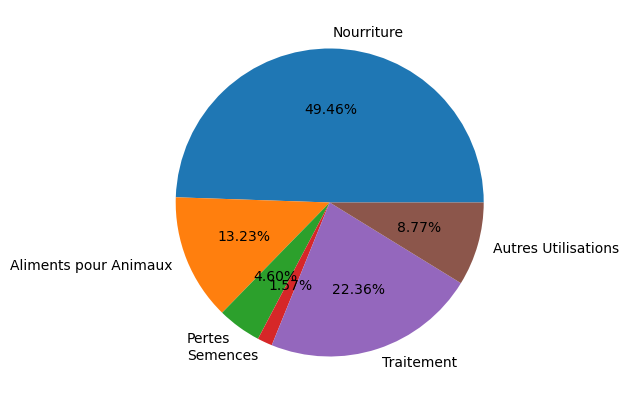

In [400]:
plt.figure(figsize = (5, 5))
x = [49.51, 13.242, 4.607, 1.571, 22.385, 8.783]
plt.pie(x, labels = ['Nourriture', 'Aliments pour Animaux', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations'], normalize = True,autopct='%1.2f%%')
plt.show()

In [376]:
print("Après analyse, nous pouvons constater que la majorité de la disponibilité intérieure mondiale est allouée à l'alimentation humaine, à hauteur de",dispo_nourriture,"%, suivie de près par la part allouée aux produits soumis à traitement ainsi que les autres utilisations, qui montent respectivement à ",dispo_traitement,"% et ",dispo_autres_utilisations,"%.")
print("On constate également que",dispo_animaux,"% de cette disponibilité intérieure est allouée à l'alimentation des animaux. On se propose donc pour la suite d'étudier plus précisément la répartition entre nourriture et aliments pour animaux pour voir si on peut y trouver un facteur d'influence, en prenant pour référence le cas des céréales.")

Après analyse, nous pouvons constater que la majorité de la disponibilité intérieure mondiale est allouée à l'alimentation humaine, à hauteur de 49.51 %, suivie de près par la part allouée aux produits soumis à traitement ainsi que les autres utilisations, qui montent respectivement à  22.385 % et  8.783 %.
On constate également que 13.242 % de cette disponibilité intérieure est allouée à l'alimentation des animaux. On se propose donc pour la suite d'étudier plus précisément la répartition entre nourriture et aliments pour animaux pour voir si on peut y trouver un facteur d'influence, en prenant pour référence le cas des céréales.


## Le cas de la répartition entre nourriture et aliments pour animaux à travers les céréales

- Après étude des données mises à disposition dans les Bilans Alimentaires de la FAO, on peut identifier 8 types de céréales utilisées à la fois pour l'alimentation humaine et l'alimentation animale, qui sont le blé, l'orge, le seigle, l'avoine, le maïs, le millet, le sorgho ainsi que d'autres céréales.
- On se propose donc de construire un tableau spécifique à ces céréales à partir du tableau d'analyse de la répartition de la disponibilité intérieure pour répondre à cette problématique.

In [377]:
tableau_analyse_cereales = tableau_analyse_repartition.loc[
                        (tableau_analyse_repartition["Produit"] == "Blé") | 
                        (tableau_analyse_repartition["Produit"] == "Orge") |
                        (tableau_analyse_repartition["Produit"] == "Seigle") |
                        (tableau_analyse_repartition["Produit"] == "Avoine") |
                        (tableau_analyse_repartition["Produit"] == "Maïs") |
                        (tableau_analyse_repartition["Produit"] == "Millet") |
                        (tableau_analyse_repartition["Produit"] == "Sorgho") |
                        (tableau_analyse_repartition["Produit"] == "Céréales,Autres")]
tableau_analyse_cereales.head()

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement,Pourcentage Nourriture,Pourcentage Aliments pour Animaux,Pourcentage Autres Utilisations,Pourcentage Pertes,Pourcentage Semences,Pourcentage Traitement
7,Afghanistan,Blé,NaN,NaN,5992.0,4895.0,775.0,322.0,NaN,81.692,NaN,NaN,12.934,5.374,NaN
32,Afghanistan,Maïs,200.0,NaN,313.0,76.0,31.0,5.0,NaN,24.281,63.898,NaN,9.904,1.597,NaN
34,Afghanistan,Millet,NaN,NaN,13.0,12.0,1.0,0.0,NaN,92.308,NaN,NaN,7.692,0.000,NaN
40,Afghanistan,Orge,360.0,NaN,524.0,89.0,52.0,22.0,NaN,16.985,68.702,NaN,9.924,4.198,NaN
67,Afrique du Sud,Avoine,8.0,NaN,49.0,40.0,1.0,1.0,NaN,81.633,16.327,NaN,2.041,2.041,NaN


In [378]:
tableau_analyse_cereales.sort_values("Produit").sum()

Zone                                 SoudanMaliSerbieEstonieBrunéi DarussalamMalteS...
Produit                              AvoineAvoineAvoineAvoineAvoineAvoineAvoineAvoi...
Aliments pour animaux                                                         820906.0
Autres Utilisations                                                           214935.0
Disponibilité intérieure                                                     1903858.0
Nourriture                                                                    646400.0
Pertes                                                                         78957.0
Semences                                                                       55141.0
Traitement                                                                     87689.0
Pourcentage Nourriture                                                             inf
Pourcentage Aliments pour Animaux                                            33561.838
Pourcentage Autres Utilisations            

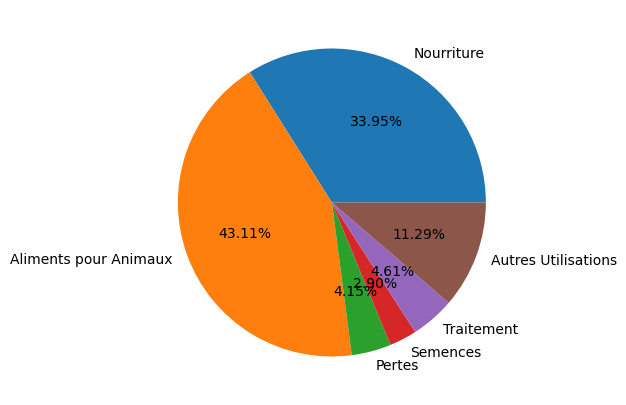

In [402]:
plt.figure(figsize = (5, 5))
x = [646400, 820906, 78957, 55141, 87689, 214935]
plt.pie(x, labels = ['Nourriture', 'Aliments pour Animaux', 'Pertes', 'Semences', 'Traitement', 'Autres Utilisations'], normalize = True,autopct='%1.2f%%')
plt.show()

- Après analyse, les données semblent indiquer que la disponibilité mondiale en céréales a l'air équitablement répartie entre l'alimentation humaine et l'alimentation animale, avec même un avantage significatif pour la dernière. On pourrait donc arriver à la conclusion que transférer une partie de l'alimentation animale à destination des humains permettrait de résorber certains problèmes.
- Une analyse des premières lignes du tableau nous indique cependant qu'il semble exister une tendance d'utilisation des céréales en deux catégories : celles destinées majoritairement à l'alimentation humaine, et celles destinées en priorité aux animaux, catégories qui fluctuent en fonction des pays.
- Pour illustrer cette situation, on se propose une étude de cas avec l'utilisation du manioc en Thaïlande.

## Etude de cas : l'utilisation du manioc en Thaïlande

Pour l'analyse de l'utilisation du manioc en Thaïlande, on va utiliser trois tableaux :
- le premier restitue les données du tableau de disponibilité alimentaire, afin d'identifier la part des exportations de manioc dans la production thaïlande et d'autre part la part de la nourriture humaine dans la disponibilité alimentaire de la Thaïlande
- le deuxième restitue la réparititon de la disponibilité intérieure en manioc de la Thaïlande, afin de mettre en valeur certains éléments du problème
- le dernier tableau provient des données du tableau de valeur nutritive et nous donne des renseignements quant à la valeur nutritive du manioc en Thaïlande

In [380]:
dispo_manioc_thailande = dispo_alimentaire.loc[(dispo_alimentaire["Zone"] == "Thaïlande") & (dispo_alimentaire["Produit"] == "Manioc")]
dispo_manioc_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [381]:
proportion_exportations_manioc_thailande = round((dispo_manioc_thailande["Exportations - Quantité"] / dispo_manioc_thailande["Production"]) * 100,3)
print(proportion_exportations_manioc_thailande)
proportion_nourriture_manioc_thailande = (dispo_manioc_thailande["Nourriture"] / dispo_manioc_thailande["Disponibilité intérieure"]) * 100
print(proportion_nourriture_manioc_thailande)

13809    83.413
dtype: float64
13809    13.904853
dtype: float64


In [382]:
tableau_analyse_repartition.loc[(tableau_analyse_repartition["Zone"] == "Thaïlande") & (tableau_analyse_repartition["Produit"] == "Manioc")]

,Zone,Produit,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement,Pourcentage Nourriture,Pourcentage Aliments pour Animaux,Pourcentage Autres Utilisations,Pourcentage Pertes,Pourcentage Semences,Pourcentage Traitement
13809,Thaïlande,Manioc,1800.0,2081.0,6264.0,871.0,1511.0,NaN,0.0,13.905,28.736,33.222,24.122,NaN,0.0


In [383]:
tableau_valeur_nutritive.loc[(tableau_valeur_nutritive["Zone"] == "Thaïlande") & (tableau_valeur_nutritive["Produit"] == "Manioc")]

,Zone,Produit,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nombre habitants,Disponibilité alimentaire en kg,Disponibilité alimentaire en kcal globale,Valeur nutritive
13620,Thaïlande,Manioc,40.0,13.0,0.05,0.14,69209810.0,899727530.0,1.010463e+12,1123.077


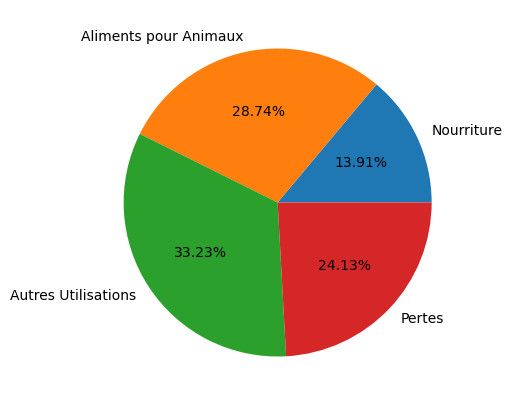

In [403]:
plt.figure(figsize = (5, 5))
x = [13.905, 28.736, 33.222, 24.122]
plt.pie(x, labels = ['Nourriture', 'Aliments pour Animaux', 'Autres Utilisations', 'Pertes'], normalize = True,autopct='%1.2f%%')
plt.show()

La situation de l'utilisation du Thaïlande nous permet donc de remettre en exergue certains problèmes vis-à-vis de la répartition des ressources alimentaires au sein d'un pays.

Si une modification de répartition des ressources alimentaires permettrait de combattre efficacement la faim dans le monde, l'utilisation même des ressources concernées est au coeur du problème. En effet, si le manioc est effectivement une ressource non négligeable pour la zone, elle n'est cependant pas le principal secteur d'utilisation de la ressource dans la zone. Dans la zone de la Thaïlande, celui-ci est en priorité destiné à la production de bio-carburant (qui correspond dans notre graphique aux "autres utilisations") et à l'alimentation du bétail. On ira même jusqu'à remarquer que le poste de pertes de manioc dépasse celui de l'alimentation humaine.

On peut donc en conclure que dans le cas de la Thaïlande, une politique visant à minimiser les pertes de manioc permettrait effectivement d'augmenter la part disponible pour la nourriture humaine, mais que dans le cas de cette zone, ça ne serait pas nécessairement suffisant pour régler les problèmes de sous-nutrition, eu égard au modèle de consommation de ce produit de la zone.

## Quelques statistiques importantes concernant les pays les plus difficultés

Pour finir notre analyse, nous avons procédé à un tri des donnée afin de mettre en valeur les pays présentant le plus de difficultés selon trois critères :
- les pays ayant la proportion de personnes sous-alimentées la plus élevée
- les pays ayant le plus bénéficié d'aides alimentaires
- les pays présentant le niveau de disponibilité alimentaire les plus opposés

### Les pays ayant proportionnellement le plus de personnes sous-alimentées

Pour retrouver les pays ayant proportionnellement le plus de personnes sous-alimentées, c'est-à-dire ayant le ratio habitants en sous-nutrition / population totale le plus élevé, on part du tableau de sous-nutrition construit précédémment pour construire le ratio recherché et extraire les valeurs les plus importantes.

In [385]:
tableau_sous_nutrition.head()

,Zone,Habitants sous-nutrition,Nombre habitants
0,Afghanistan,10500000.0,36296113.0
1,Afrique du Sud,3100000.0,57009756.0
2,Albanie,100000.0,2884169.0
3,Algérie,1300000.0,41389189.0
4,Allemagne,0.0,82658409.0


In [386]:
tableau_sous_nutrition['Pourcentage sous_nutrition'] = round((tableau_sous_nutrition['Habitants sous-nutrition'] / tableau_sous_nutrition['Nombre habitants']) * 100,3)
tableau_sous_nutrition.sort_values('Pourcentage sous_nutrition', ascending=False).head()

,Zone,Habitants sous-nutrition,Nombre habitants,Pourcentage sous_nutrition
78,Haïti,5300000.0,10982366.0,48.259
157,République populaire démocratique de Corée,12000000.0,25429825.0,47.189
108,Madagascar,10500000.0,25570512.0,41.063
103,Libéria,1800000.0,4702226.0,38.280
100,Lesotho,800000.0,2091534.0,38.249


### Les pays ayant le plus bénéficié d'aides alimentaires en 2013

    Le fichier d'aide alimentaire est un tableau renseignant tous les pays ayant bénéficié d'une aide alimentaire en fonction de l'année, de la ressource donnée et de la quantité exprimée en tonnes. 
    Pour répondre à notre question, nous définissons ici l'aide alimentaire totale d'un pays comme la somme des aides alimentaires individuelles de chaque ressource allouée pour une année donnée. 
    Nous choisissons ici de nous focaliser sur l'année 2013 afin de construire le tableau qui permettra de répondre à notre question.

In [387]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [388]:
aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [389]:
aide_alimentaire2013 = aide_alimentaire.loc[aide_alimentaire['Année'] == 2013]
aide_alimentaire2013.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
2,Afghanistan,2013,Blé et Farin,39224
4,Afghanistan,2013,Céréales,40504
6,Afghanistan,2013,"Fruits secs, total",85
7,Afghanistan,2013,Huiles végétales,11087


In [390]:
aide_alimentaire2013 = aide_alimentaire2013.drop(columns = ['Année'])
aide_alimentaire2013 = aide_alimentaire2013.groupby('Pays bénéficiaire').sum()
aide_alimentaire2013

,Valeur
Pays bénéficiaire,
Afghanistan,128238
Algérie,35234
Angola,5000
Bangladesh,131018
Bhoutan,1724
...,...
Zambie,328
Zimbabwe,21252
Égypte,1122


In [391]:
aide_alimentaire2013.sort_values('Valeur',ascending=False)

,Valeur
Pays bénéficiaire,
Éthiopie,591404
République arabe syrienne,563566
Soudan,330230
Yémen,264764
Kenya,220966
...,...
Tadjikistan,746
Iraq,666
Zambie,328


### Les pays avec la disponibilité alimentaire la plus / moins élevée pour l'année 2017

    Enfin, pour répondre à notre dernière question, nous allons procéder en deux étapes :
- à partir du tableau des besoins construit précédemment, nous procédons à une élimination des colonnes non pertinentes, avant de fusionner le tableau avec le tableau des niveaux de population pour l'année 2017 dans les différentes zones
- nous définissons ici le niveau de disponibilité alimentaire d'un pays de la manière suivante :

**Niveau de disponibilité = Disponibilité annuelle / (Nombre d'habitants * Nombre de jours)**

- cette définition nous permet d'obtenir le nombre de calories qu'un habitant d'un pays peut obtenir par jour ; rappelons par d'ailleurs que le nombre de calories recommandé posé au début de notre analyse est de 2400.
- une fois notre tableau construit, nous procédons à un tri des données pour mettre en opposition les 5 pays ayant le niveau de disponibilité le plus élevé et les 5 derniers.

In [392]:
tableau_besoin.head()

,Zone,Nombre habitants,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité annuelle
0,Afghanistan,36296113.0,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,6.624041e+10
1,Afghanistan,36296113.0,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,1.324808e+10
2,Afghanistan,36296113.0,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.324808e+10
3,Afghanistan,36296113.0,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00
4,Afghanistan,36296113.0,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,5.299232e+10


In [393]:
tableau_besoin_disponibilité = tableau_besoin.drop(columns = ['Nombre habitants','Origine',                                                                       'Origine',
                                                                         'Aliments pour animaux',
                                                                         'Autres Utilisations',
                                                                         'Disponibilité alimentaire (Kcal/personne/jour)',
                                                                         'Disponibilité alimentaire en quantité (kg/personne/an)',
                                                                         'Disponibilité de matière grasse en quantité (g/personne/jour)',
                                                                         'Disponibilité de protéines en quantité (g/personne/jour)',
                                                                         'Exportations - Quantité',
                                                                         'Importations - Quantité',
                                                                         'Nourriture',
                                                                         'Pertes',
                                                                         'Production',
                                                                         'Semences',
                                                                         'Traitement',
                                                                         'Variation de stock'])
tableau_besoin_disponibilité = tableau_besoin_disponibilité.groupby('Zone').sum()
tableau_besoin_disponibilité.head()

,Disponibilité intérieure,Disponibilité annuelle
Zone,,
Afghanistan,13515.0,2.764875e+13
Afrique du Sud,61256.0,6.284185e+13
Albanie,4758.0,3.356077e+12
Algérie,42630.0,4.974753e+13
Allemagne,162275.0,1.056866e+14


In [394]:
tableau_besoin_proportion = pd.merge(population2017,tableau_besoin_disponibilité, on='Zone')
tableau_besoin_proportion.head()

,Zone,Nombre habitants,Disponibilité intérieure,Disponibilité annuelle
0,Afghanistan,36296113.0,13515.0,2.764875e+13
1,Afrique du Sud,57009756.0,61256.0,6.284185e+13
2,Albanie,2884169.0,4758.0,3.356077e+12
3,Algérie,41389189.0,42630.0,4.974753e+13
4,Allemagne,82658409.0,162275.0,1.056866e+14


In [406]:
tableau_besoin_proportion["Ratio disponibilité"] = round((tableau_besoin_proportion["Disponibilité annuelle"] / tableau_besoin_proportion["Nombre habitants"] / nombre_jours),3)
tableau_besoin_proportion.sort_values('Ratio disponibilité',ascending=False).head(10).reset_index()

,index,Zone,Nombre habitants,Disponibilité intérieure,Disponibilité annuelle,Ratio disponibilité
0,11,Autriche,8819901.0,19308.0,1.213662e+13,3770.0
1,17,Belgique,11419748.0,29358.0,1.557659e+13,3737.0
2,163,Turquie,81116450.0,131377.0,1.097846e+14,3708.0
3,54,États-Unis d'Amérique,325084756.0,777992.0,4.368912e+14,3682.0
4,80,Israël,8243848.0,11267.0,1.086251e+13,3610.0
5,78,Irlande,4753279.0,10738.0,6.249278e+12,3602.0
6,81,Italie,60673701.0,97405.0,7.923803e+13,3578.0
7,95,Luxembourg,591910.0,802.0,7.648069e+11,3540.0
8,47,Égypte,96442591.0,115133.0,1.238390e+14,3518.0
9,4,Allemagne,82658409.0,162275.0,1.056866e+14,3503.0


In [408]:
tableau_besoin_proportion.sort_values('Ratio disponibilité').head(10).reset_index()

,index,Zone,Nombre habitants,Disponibilité intérieure,Disponibilité annuelle,Ratio disponibilité
0,131,République centrafricaine,4596023.0,2582.0,3.152113e+12,1879.0
1,170,Zambie,16853599.0,10041.0,1.183561e+13,1924.0
2,97,Madagascar,25570512.0,15216.0,1.918914e+13,2056.0
3,0,Afghanistan,36296113.0,13515.0,2.764875e+13,2087.0
4,70,Haïti,10982366.0,6175.0,8.373889e+12,2089.0
5,136,République populaire démocratique de Corée,25429825.0,14876.0,1.942699e+13,2093.0
6,156,Tchad,15016753.0,5304.0,1.155967e+13,2109.0
7,171,Zimbabwe,14236595.0,9507.0,1.097990e+13,2113.0
8,120,Ouganda,41166588.0,26624.0,3.194486e+13,2126.0
9,55,Éthiopie,106399924.0,44014.0,8.268178e+13,2129.0
